In [38]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
from scipy.optimize import curve_fit

In [39]:
#2.1
data = Table.read('global_SF6_MM.dat', format ='ascii')

data

SF6ottoyr,SF6ottomon,SF6ottoNHm,SF6ottoNHsd,SF6ottoSHm,SF6ottoSHsd,SF6ottoGLm,SF6ottoGLsd
int32,int32,float64,float64,float64,float64,float64,float64
1995,1,3.533,0.029,3.207,0.125,3.37,0.064
1995,2,3.512,0.154,3.282,0.193,3.397,0.122
1995,3,3.558,0.159,3.244,0.12,3.401,0.1
1995,4,3.618,0.09,3.287,0.17,3.453,0.094
1995,5,3.626,0.133,3.308,0.139,3.467,0.099
1995,6,3.551,0.119,3.297,0.112,3.424,0.081
1995,7,3.677,0.093,3.262,0.124,3.47,0.078
1995,8,3.675,0.211,3.259,0.191,3.467,0.143
1995,9,3.626,0.063,3.346,0.064,3.486,0.043


In [40]:
#2.2
df = data.to_pandas()

df = df[['SF6ottoyr', 'SF6ottoGLm', 'SF6ottoGLsd']]
df


,SF6ottoyr,SF6ottoGLm,SF6ottoGLsd
0,1995,3.370,0.064
1,1995,3.397,0.122
2,1995,3.401,0.100
3,1995,3.453,0.094
4,1995,3.467,0.099
...,...,...,...
223,2013,NaN,NaN
224,2013,NaN,NaN
225,2013,NaN,NaN
226,2013,NaN,NaN


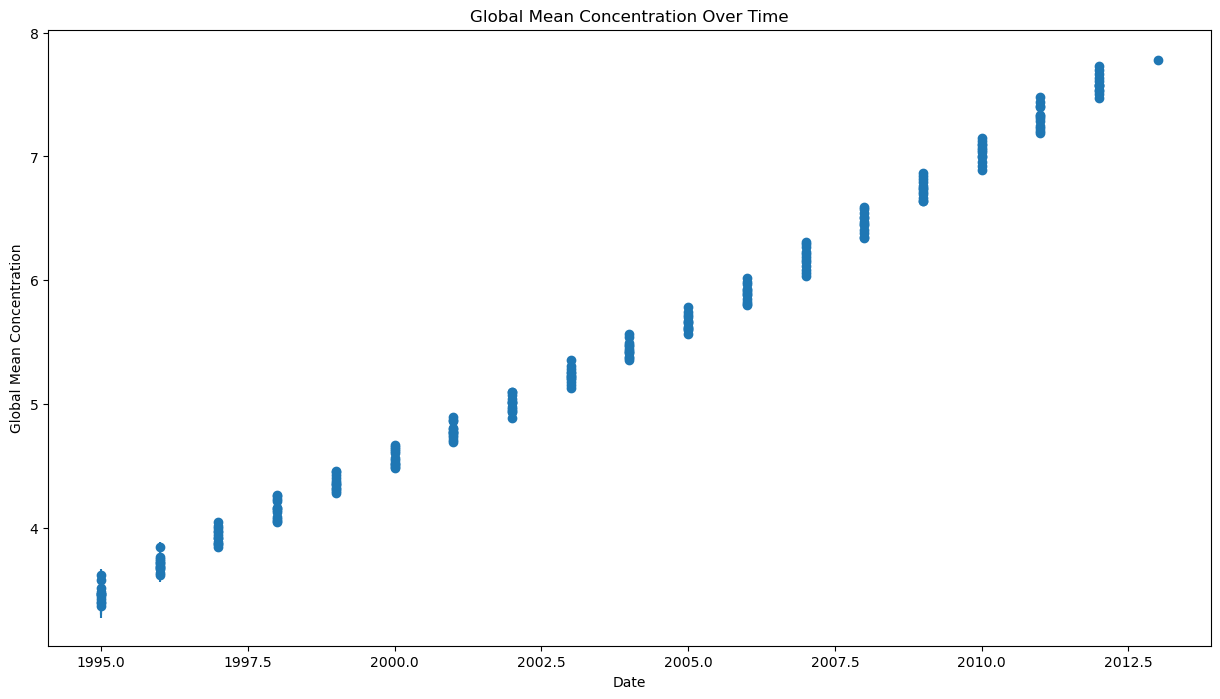

In [41]:
#2.3 
plt.figure(figsize = (15, 8))
plt.errorbar(data_df['SF6ottoyr'], data_df['SF6ottoGLm'], yerr = data_df['SF6ottoGLsd'], fmt = 'o')
plt.title('Global Mean Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.show()

In [43]:
#2.4
#coefficients = np.polyfit(data_df['SF6ottoyr'], data_df['SF6ottoGLm'], deg = 1)
def linearmod(x, m, b):
    return m * x + b
    
parameters, covariance = curve_fit(linearmod, data_df['SF6ottoyr'], data_df['SF6ottoGLm'])
slope, intercept = paramters
SlopeError, InterceptError = np.sqrt(np.diag(covariance))


ValueError: array must not contain infs or NaNs

In [49]:
#2.4
data_df = data_df.dropna()
coeffs = np.polyfit(data_df['SF6ottoyr'], data_df['SF6ottoGLm'], deg = 1)

data_df

,SF6ottoyr,SF6ottomon,SF6ottoNHm,SF6ottoNHsd,SF6ottoSHm,SF6ottoSHsd,SF6ottoGLm,SF6ottoGLsd
0,1995,1,3.533,0.029,3.207,0.125,3.370,0.064
1,1995,2,3.512,0.154,3.282,0.193,3.397,0.122
2,1995,3,3.558,0.159,3.244,0.120,3.401,0.100
3,1995,4,3.618,0.090,3.287,0.170,3.453,0.094
4,1995,5,3.626,0.133,3.308,0.139,3.467,0.099
...,...,...,...,...,...,...,...,...
212,2012,9,7.793,0.025,7.470,0.029,7.631,0.019
213,2012,10,7.838,0.027,7.498,0.044,7.668,0.026
214,2012,11,7.867,0.029,7.523,0.032,7.695,0.022
215,2012,12,7.897,0.025,7.564,0.038,7.730,0.022


In [52]:
#2.5 

predictions = np.polyval(coeffs, data_df['SF6ottoyr'])
residuals = data_df['SF6ottoGLm'] - predictions
ChiSquared = np.sum((residuals / data_df['SF6ottoGLsd']) ** 2) / (len(data_df) - 2)

ChiSquared

21.897233441124833

In [68]:
#2.6
print(f"{slope:.2f}")
print(f"{intercept:.2f}")
print(f"{ChiSquared:.2f}")
print(f"{slope:.2f} * x + {intercept:.2f}")

NameError: name 'slope' is not defined

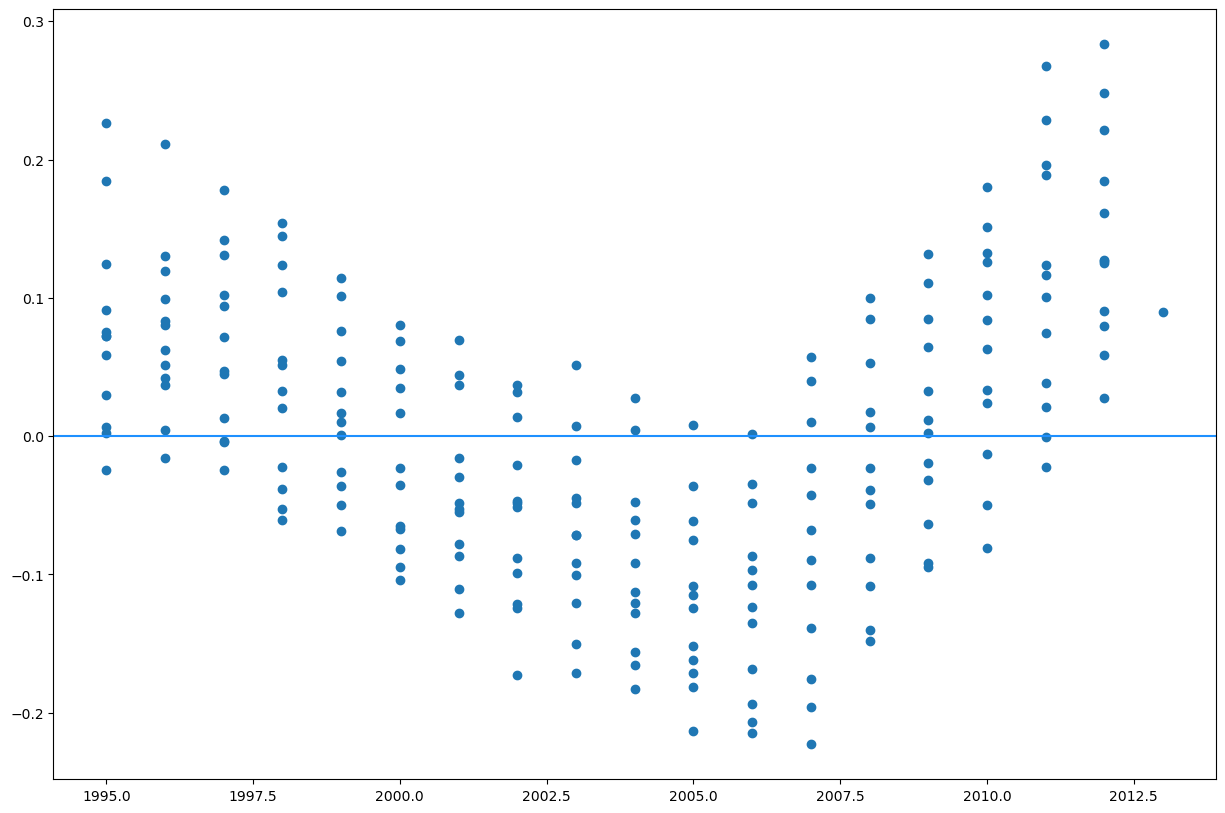

In [64]:
#2.7
plt.figure(figsize = (15, 10))
plt.scatter(data_df['SF6ottoyr'], residuals)

plt.axhline(y=0, color = 'dodgerblue')

In [ ]:
#to whoever is grading this: im so sorry its so bad. Everything is kinda pilingup right now so i did the best with what i could